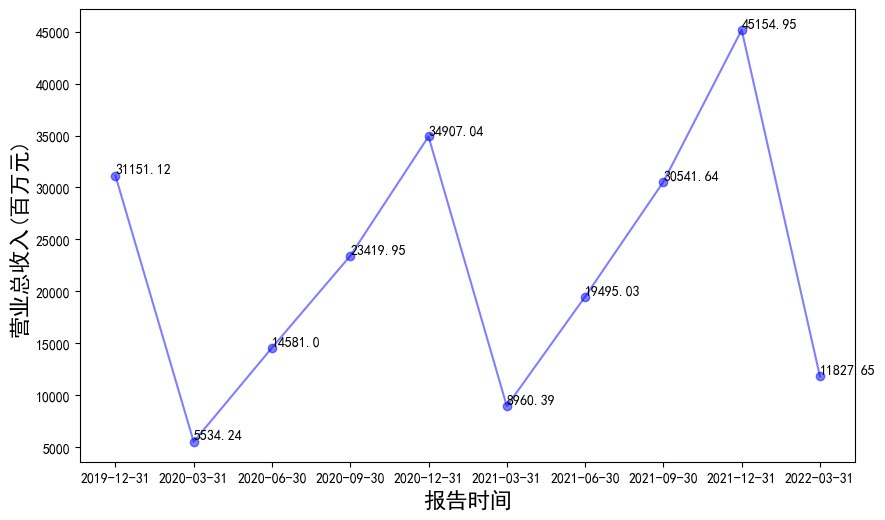

In [3]:
# 网易数据
# 导入库
import pandas as pd
import matplotlib.pyplot as plt

# 获取数据
ts_data = pd.read_csv('lrb600233.csv',encoding='utf-8')

# 将数据转换为DataFrame数据
df1 = pd.DataFrame(ts_data)

df1.duplicated().sum()
df1.isna().sum()

# 重复数据处理
df1 = df1.drop_duplicates()
# 空值处理
df1 = df1.dropna(axis=0, how='all')

# 反转行，使小年份在前面
max_i = df1.shape[0]
for i in range(max_i):
    df1.iloc[i] = df1.iloc[i][::-1]
df1.columns = df1.columns[::-1]
# 设置行名
df1.index = df1['报告日期']
df1 = df1.drop(['报告日期'], axis=1)
# 转置表
df1 = pd.DataFrame(df1.values.T, index=df1.columns, columns=df1.index)
df1 = df1.dropna(axis=0, how='all')
df1=df1[-10:]

# # 设置x，y周数据
y=[int(x)/100 for x in df1['营业总收入(万元)']]
x = df1.index

# 解决汉字显示乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置画布大小
plt.subplots(1, 1, figsize=(10, 6), dpi=100)
# 折线图
plt.plot(x, y, color='blue', marker='o', linestyle='-', alpha=0.5)

# 添加标签
plt.xlabel('报告时间', fontsize='16')
plt.ylabel('营业总收入(百万元)', fontsize='16')
# 对每个数据点加标注
for x_, y_ in zip(x, y):
    plt.text(x_, y_, y_, ha='left', va='bottom')
